facial-keypoints-detection/IdLookupTable.csv
facial-keypoints-detection/test.zip
facial-keypoints-detection/SampleSubmission.csv
facial-keypoints-detection/training.zip


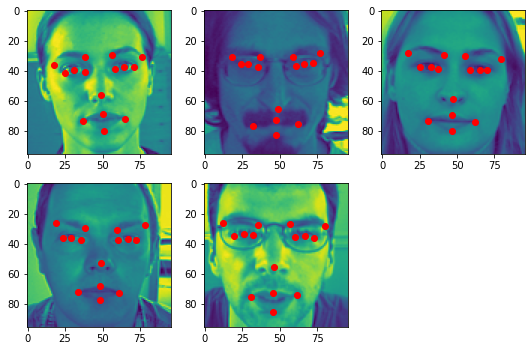

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('facial-keypoints-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
X_train = pd.read_csv('facial-keypoints-detection/training.zip')
X_test_original = pd.read_csv('facial-keypoints-detection/test.zip')
X_test_original = X_test_original.Image
X_test_original = X_test_original.apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


X_train = X_train.dropna()
y_train = X_train.drop(['Image'], axis=1)
X_train = X_train.Image
X_train = X_train.apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))
X_train /= 255.0
X_test_original /= 255.0

fig = plt.figure(figsize=(9, 9))

for f,i in enumerate(np.random.randint(500, size=5).tolist()):
    ax = fig.add_subplot(3, 3, f + 1)
    plt.imshow(X_train[i])
    for j in range(1, 31, 2):
        plt.plot(y_train.loc[i][j-1], y_train.loc[i][j], 'ro')

plt.show()

In [ ]:

import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, LeakyReLU

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        864       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [ ]:

X_train = X_train.to_numpy()
X_test_original = X_test_original.to_numpy()

X_train = X_train.flatten()
X_test_original = X_test_original.flatten()

X_train = np.concatenate(X_train, axis=0)
X_train = np.concatenate(X_train, axis=0)

X_test_original = np.concatenate(X_test_original, axis=0)
X_test_original = np.concatenate(X_test_original, axis=0)

X_train = X_train.reshape((-1, 96, 96))
X_test_original = X_test_original.reshape((-1, 96, 96))

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=0)

X_train = X_train.reshape((-1, 96, 96, 1))
X_valid = X_valid.reshape((-1, 96, 96, 1))
X_test = X_test.reshape((-1, 96, 96, 1))

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=0)

X_train = X_train.reshape((-1, 96, 96, 1))
X_valid = X_valid.reshape((-1, 96, 96, 1))
X_test = X_test.reshape((-1, 96, 96, 1))

print(X_train.shape)
print(X_test.shape)

from tensorflow.keras import callbacks
from tensorflow import keras

early_stopping = callbacks.EarlyStopping(
    min_delta=0.1, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs'),
    early_stopping
]

X_train = np.concatenate((X_train,X_train,X_train), axis=-1)
X_test = np.concatenate((X_test,X_test,X_test), axis=-1)
X_valid = np.concatenate((X_valid,X_valid,X_valid), axis=-1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

opt = keras.optimizers.Adam(learning_rate=0.03)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=150, callbacks=callbacks)

(1369, 96, 96, 1)
(69, 96, 96, 1)
(1369, 96, 96, 3)
(69, 96, 96, 3)
(274, 96, 96, 3)
(1369, 96, 96, 3)
(1369, 30)
(274, 96, 96, 3)
(274, 30)
Train on 1369 samples, validate on 274 samples
Epoch 1/150
1369/1369 [==============================] - 88s 64ms/sample - loss: 23003.4156 - mean_absolute_error: 55.7871 - val_loss: 36492333.1387 - val_mean_absolute_error: 4342.0156
Epoch 2/150
1369/1369 [==============================] - 88s 64ms/sample - loss: 112.7817 - mean_absolute_error: 7.8375 - val_loss: 11568.3353 - val_mean_absolute_error: 74.1839
Epoch 3/150
1369/1369 [==============================] - 88s 65ms/sample - loss: 78.1482 - mean_absolute_error: 6.7563 - val_loss: 341.3080 - val_mean_absolute_error: 11.7277
Epoch 4/150
1369/1369 [==============================] - 89s 65ms/sample - loss: 51.7503 - mean_absolute_error: 5.4033 - val_loss: 55.6579 - val_mean_absolute_error: 5.8151
Epoch 5/150
1369/1369 [==============================] - 89s 65ms/sample - loss: 55.3354 - mean_abso

In [ ]:
model.save_weights('model.h5')

In [ ]:
model.save('Saved-model')

In [ ]:

loss, mae = model.evaluate(X_test, y_test)  # returns loss and metrics
print("loss: %.2f" % loss)
print("mae: %.2f" % mae)#mean absolute error

X_test_original = X_test_original.reshape((-1,96,96,1))
X_test_original = np.concatenate((X_test_original,X_test_original,X_test_original), axis=-1)
print(X_test_original.shape)
predictions = model.predict(X_test_original)

69/69 [==============================] - 1s 12ms/sample - loss: 16.0197 - mean_absolute_error: 2.8446
loss: 16.02
mae: 2.84
(1783, 96, 96, 3)


In [ ]:
print(predictions.shape)

(1783, 30)


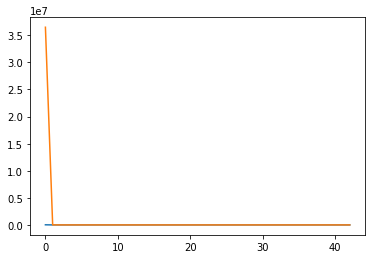

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

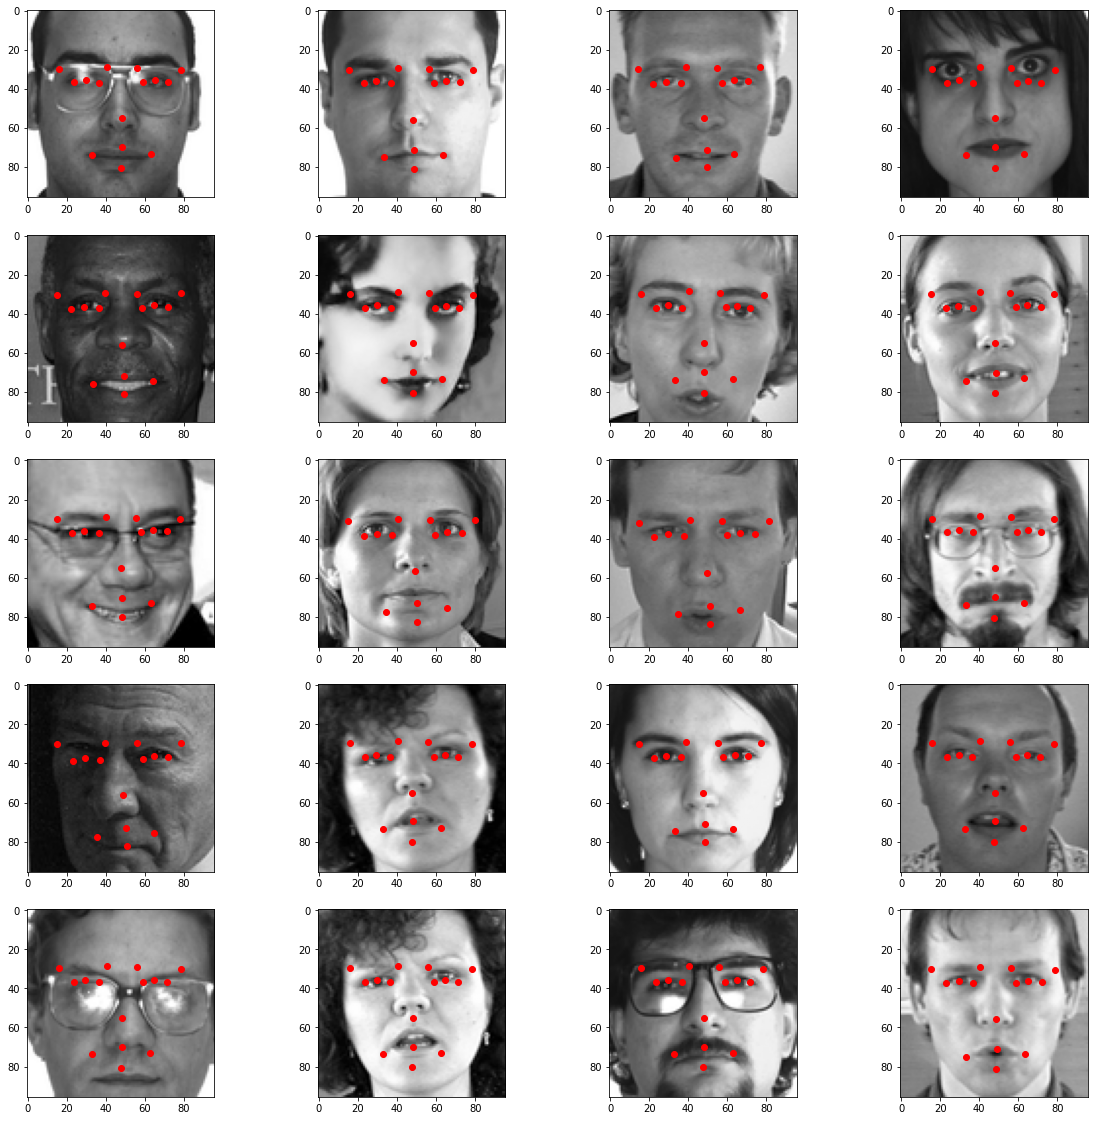

In [ ]:

def plot_test_image(df,prediction, index):
    image = plt.imshow(df[index])
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(prediction[index][i-1], prediction[index][i], 'ro'))
        
    return image, l
fig = plt.figure(figsize=(20, 20))

for i in range(20):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_test_image(X_test,predictions, i)

plt.show()